In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

In [18]:
dataset = pd.read_csv('./data/usa-housing-modified.csv')

dataset['Avg_Area_Income'] = (
    dataset['Avg_Area_Income'] - dataset['Avg_Area_Income'].mean()
) / dataset['Avg_Area_Income'].std()
dataset['Area_Population'] = (
    dataset['Area_Population'] - dataset['Area_Population'].mean()
) / dataset['Area_Population'].std()
# dataset['Price'] = (
#     dataset['Price'] - dataset['Price'].mean()
# ) / dataset['Price'].std()

In [19]:
x = dataset[['Avg_Area_Income', 'Area_Population']].to_numpy()
y = dataset[['Price']].to_numpy()

In [20]:
tmp_x = np.column_stack((np.ones(x.shape[0]), x))
    
calc_theta = lambda x, y: np.linalg.inv(x.T @ x) @ x.T @ y

print(calc_theta(tmp_x, y))

[[1232072.6541]
 [228303.4530]
 [147974.5013]]


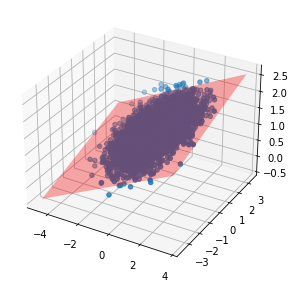

In [21]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection="3d")
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 100)
y1 = np.linspace(x[:,1].min(), x[:,1].max(), 100)
X, Y = np.meshgrid(x1, y1)

Xp = np.concatenate(
    [
        np.ones(X.shape).ravel()[:, np.newaxis],
        X.ravel()[:, np.newaxis], 
        Y.ravel()[:, np.newaxis]
    ],
    axis=1
)

Z = np.dot(Xp, calc_theta(tmp_x, y)).reshape((100, 100))

ax.scatter(x[:, 0], x[:, 1], y, c='C0')
ax.plot_surface(X, Y, Z, color='red', alpha=0.35)
fig.tight_layout()

In [22]:
x1 = np.linspace(0, 1, 100)
x2 = 3 * np.linspace(0, 1, 100) ** 2 + np.random.normal(0, 0.2, x1.shape[0])
y = np.sin(x1 * np.pi * x2)
tn = y + np.random.normal(0, 0.1, x1.shape[0])

dataset2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': tn
})


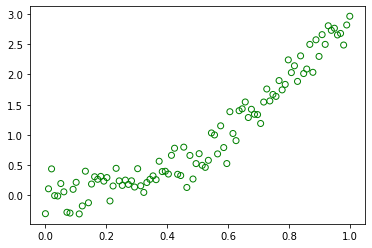

In [23]:
plt.scatter(x1, x2, facecolors='none', edgecolors='green')
# plt.plot(x1, y, 'b-')
plt.show()

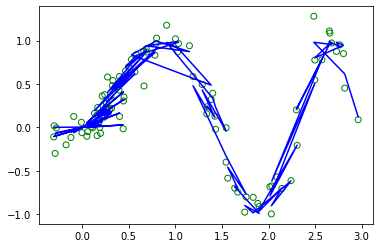

In [28]:
plt.scatter(x2, tn, facecolors='none', edgecolors='green')
plt.plot(x2, y, 'b-')
plt.show()